In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Section 1: Deal with original data

In [2]:
import os

In [3]:
# get all the original_data file name list
data_list = os.listdir('original_data')
data_list

['cpu_trade.csv',
 'dongguan.csv',
 'finance_perhost.csv',
 'gsbp_perhost.csv',
 'push_perhost.csv',
 'risktest_perhost.csv',
 'rps_trade.csv',
 'shouye_perhost.csv',
 'trade_prehost.csv',
 'zhengtong.csv',
 'zixuan_perhost.csv',
 'zixun_perhost.csv']

In [4]:
def format_col_data(raw_data):
    """
    Change the format of the data.
    """
    new_data = {}
    for k, v in raw_data.iteritems():
        frames = []
        groups = v.groupby('Series')
        for i, j in groups.groups.iteritems():
            # +08：00
            idx = pd.to_datetime(v.loc[j.values, 'Time']) + pd.Timedelta('8 h')
            frame = pd.DataFrame(v.loc[j.values, 'Value'].values, index=idx, columns=[i])
            frames.append(frame)
        new_data[k] = pd.concat(frames, axis=1)
    return new_data

In [5]:
path = 'original_data/'
dest_path = 'new_data/'
read_len = len(data_list)
raw_data = {}

In [13]:
# load raw_data from files
for i in range(read_len):
    raw_data[data_list[i]] = pd.read_csv(path + data_list[i], delimiter=';', skiprows=1)
    print "load {!r} success~！".format(data_list[i])

load 'cpu_trade.csv' success~！
load 'dongguan.csv' success~！
load 'finance_perhost.csv' success~！
load 'gsbp_perhost.csv' success~！
load 'push_perhost.csv' success~！
load 'risktest_perhost.csv' success~！
load 'rps_trade.csv' success~！
load 'shouye_perhost.csv' success~！
load 'trade_prehost.csv' success~！
load 'zhengtong.csv' success~！
load 'zixuan_perhost.csv' success~！
load 'zixun_perhost.csv' success~！


In [14]:
# generate new_data and write to file
new_data = format_col_data(raw_data)
print "new data"
for k, v in new_data.iteritems():
    v.to_csv(dest_path + k)
    print "write {!r} success!".format(k)

new data
write 'risktest_perhost.csv' success!
write 'push_perhost.csv' success!
write 'dongguan.csv' success!
write 'trade_prehost.csv' success!
write 'shouye_perhost.csv' success!
write 'finance_perhost.csv' success!
write 'zixuan_perhost.csv' success!
write 'zixun_perhost.csv' success!
write 'cpu_trade.csv' success!
write 'zhengtong.csv' success!
write 'gsbp_perhost.csv' success!
write 'rps_trade.csv' success!


In [15]:
new_data.keys()

['risktest_perhost.csv',
 'push_perhost.csv',
 'dongguan.csv',
 'trade_prehost.csv',
 'shouye_perhost.csv',
 'finance_perhost.csv',
 'zixuan_perhost.csv',
 'zixun_perhost.csv',
 'cpu_trade.csv',
 'zhengtong.csv',
 'gsbp_perhost.csv',
 'rps_trade.csv']

In [16]:
choosen = 'dongguan.csv'

In [17]:
new_data[choosen].columns

Index([u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, servicecode=SHOUYE}',
       u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, servicecode=FINANCE}',
       u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, servicecode=TRADE}'],
      dtype='object')

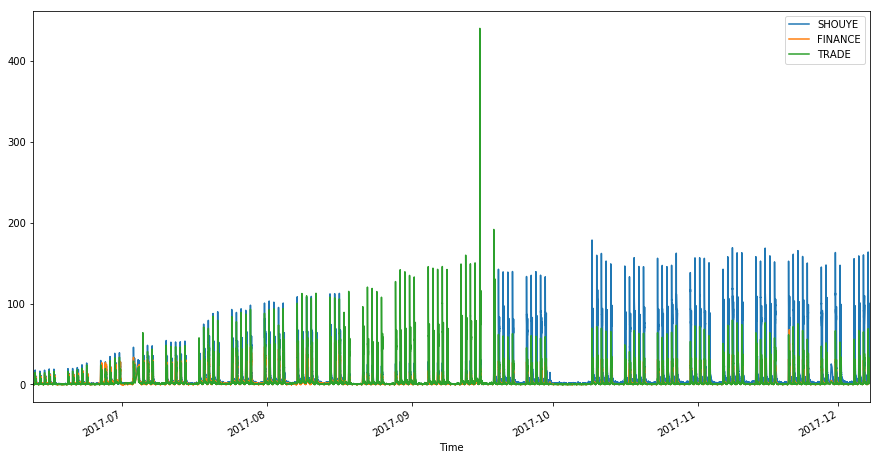

In [18]:
test_data = new_data[choosen]
test_data.columns = ['SHOUYE', 'FINANCE', 'TRADE']
test_data.plot(figsize=(15, 8))
plt.show()

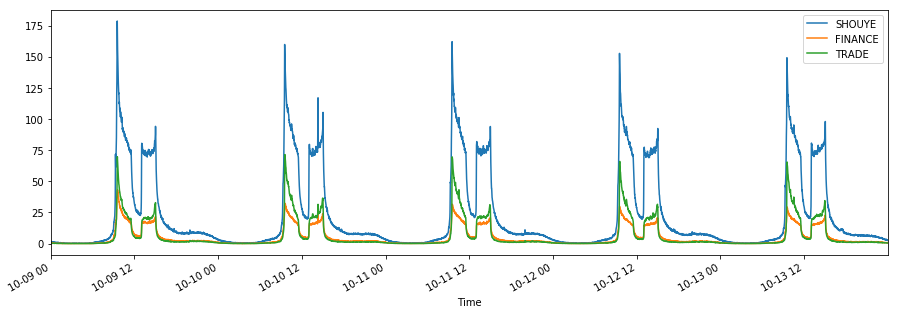

In [19]:
test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59'].plot(figsize=(15, 5))
plt.show()

In [20]:
date_list = sorted(set(i.strftime('%Y-%m-%d') for i in test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'].index))
date_list

['2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13']

In [21]:
np.where(np.diff(test_data.loc['2017-10-10'].index) -60000000000)

(array([240], dtype=int64),)

In [22]:
test_data.loc['2017-10-09'].index[230:245]

DatetimeIndex(['2017-10-09 03:50:00', '2017-10-09 03:51:00',
               '2017-10-09 03:52:00', '2017-10-09 03:53:00',
               '2017-10-09 03:54:00', '2017-10-09 03:55:00',
               '2017-10-09 03:56:00', '2017-10-09 03:57:00',
               '2017-10-09 03:58:00', '2017-10-09 03:59:00',
               '2017-10-09 04:00:00', '2017-10-09 04:02:00',
               '2017-10-09 04:03:00', '2017-10-09 04:04:00',
               '2017-10-09 04:05:00'],
              dtype='datetime64[ns]', name=u'Time', freq=None)

In [23]:
base_data = test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'].values.reshape((5, -1))
base_data.shape

(5L, 1439L)

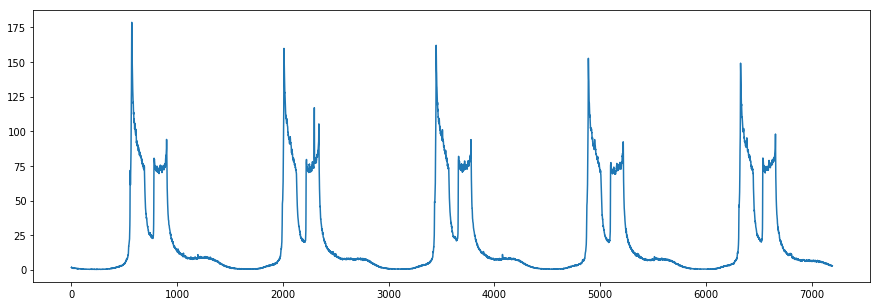

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(base_data.ravel())
plt.show()

# Section2: Test Outlier Detection Algorithms

In [25]:
# from __future__ import print_function, division
from PyAstronomy import pyasl

In [20]:
x = base_data.ravel()
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

Number of outliers:  4
Indices of outliers:  [571, 570, 572, 573]
        R      Lambda
 1   4.96522   4.49224
 2   4.68885   4.49221
 3   4.66294   4.49218
 4   4.50265   4.49215
 5   4.46874   4.49212
 6   4.40359   4.49209
 7   4.28008   4.49206
 8   4.24972   4.49203
 9   4.25441   4.49200
10   4.19859   4.49197


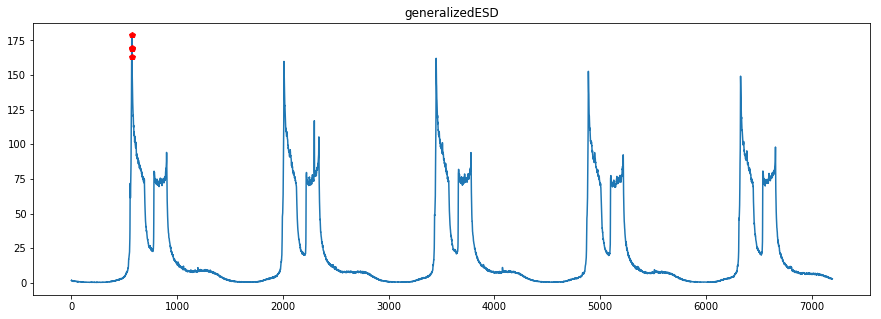

In [21]:
print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.figure(figsize=(15, 5))
plt.plot(x)
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.title('generalizedESD')
plt.savefig('generalizedESD')
plt.show()

In [22]:
train_data = np.concatenate((test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'].values,
                           test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'FINANCE'].values,
                           test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'TRADE'].values), axis=0).reshape((-1, 3))

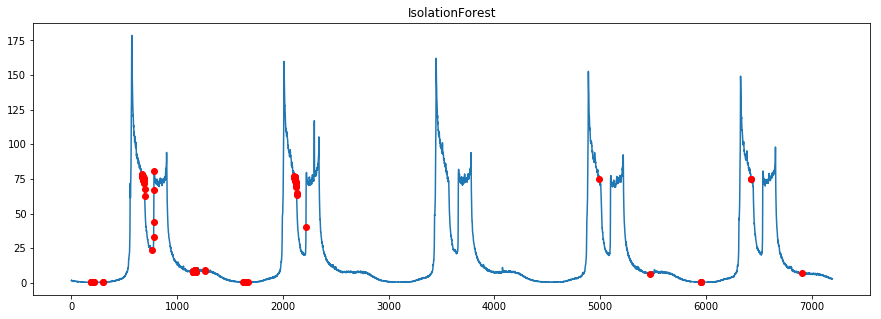

In [23]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=42, contamination=0.02)
clf.fit(train_data)
preds = clf.predict(train_data)
# np.where(preds==-1)

mu = base_data.mean(axis=0)
plt.figure(figsize=(15, 5))
plt.plot((base_data).ravel())
plt.plot(np.where(preds==-1)[0], (base_data).ravel()[np.where(preds==-1)[0]], 'ro')
plt.title('IsolationForest')
# plt.savefig('IsolationForest')
plt.show()

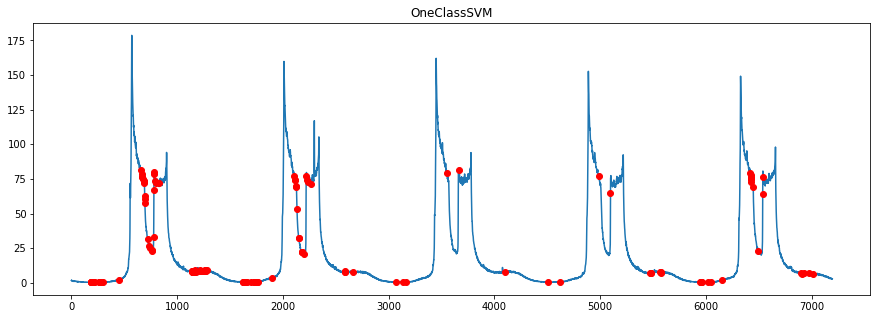

In [24]:
from sklearn import svm

outliers_fraction = 0.005
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(train_data)
preds = clf.predict(train_data)
# np.where(preds==-1)

plt.figure(figsize=(15, 5))
plt.plot((base_data).ravel())
plt.plot(np.where(preds==-1)[0], (base_data).ravel()[np.where(preds==-1)[0]], 'ro')
plt.title('OneClassSVM')
# plt.savefig('OneClassSVM')
plt.show()

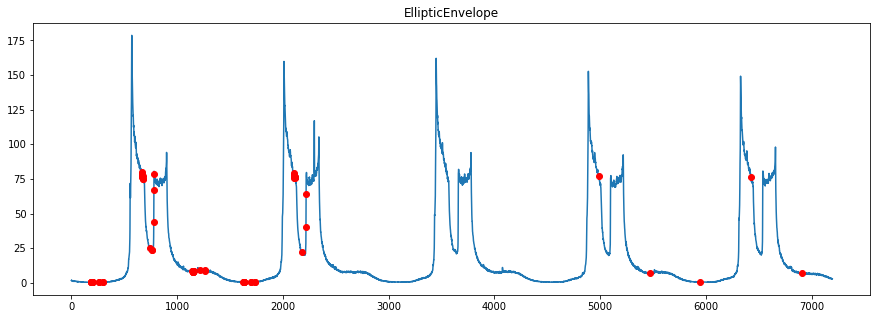

In [25]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.01)
clf.fit(train_data)
preds = clf.predict(train_data)
# np.where(preds==-1)

plt.figure(figsize=(15, 5))
plt.plot((base_data).ravel())
plt.plot(np.where(preds==-1)[0], (base_data).ravel()[np.where(preds==-1)[0]], 'ro')
plt.title('EllipticEnvelope')
# plt.savefig('EllipticEnvelope')
plt.show()

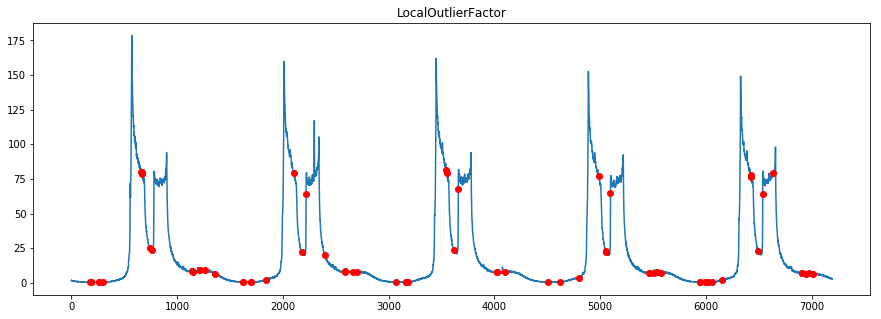

In [26]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=35, contamination=0.01)
preds = clf.fit_predict(train_data)
plt.figure(figsize=(15, 5))
plt.plot((base_data).ravel())
plt.plot(np.where(preds==-1)[0], (base_data).ravel()[np.where(preds==-1)[0]], 'ro')
plt.title('LocalOutlierFactor')
# plt.savefig('LocalOutlierFactor')
plt.show()

In [32]:
from sklearn.preprocessing import normalize

In [28]:
?normalize

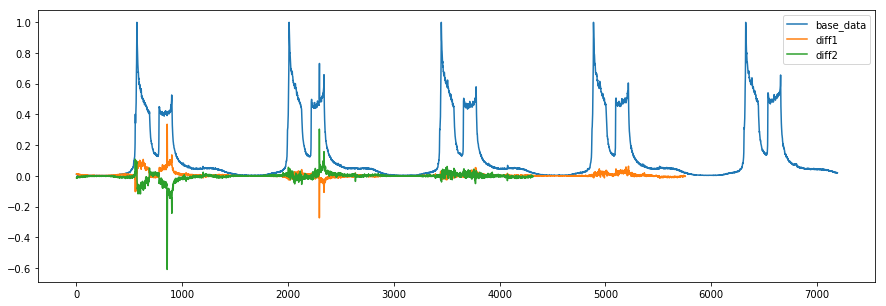

In [29]:
base_data_norm = normalize(base_data, norm='max')
base_data_diff1 = np.diff(base_data_norm, n=1, axis=0)
base_data_diff2 = np.diff(base_data_norm, n=2, axis=0)
plt.figure(figsize=(15, 5))
plt.plot((base_data_norm).ravel(), label='base_data')
plt.plot((base_data_diff1).ravel(), label='diff1')
plt.plot((base_data_diff2).ravel(), label='diff2')
# # plt.plot(np.where(preds==-1)[0], (base_data).ravel()[np.where(preds==-1)[0]], 'ro')
# # plt.title('LocalOutlierFactor')
# # plt.savefig('LocalOutlierFactor')
plt.legend()
plt.show()


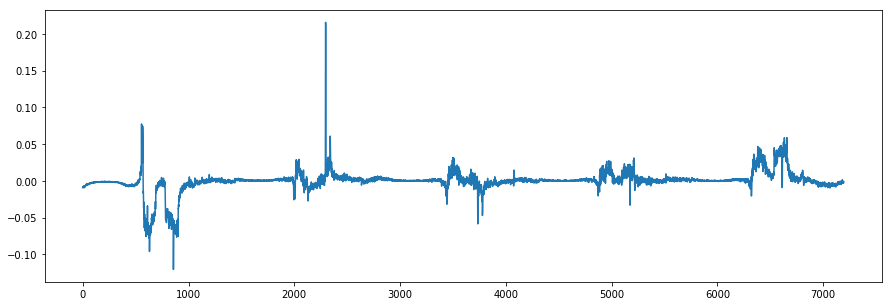

In [30]:
mu = base_data_norm.mean(axis=0)
diff_data = base_data_norm - mu
plt.figure(figsize=(15, 5))
plt.plot(diff_data.ravel())
plt.show()

Number of outliers:  5
Indices of outliers:  [2296, 2297, 857, 2295, 858]
        R      Lambda
 1  14.84009   4.49224
 2  14.80402   4.49221
 3   8.53980   4.49218
 4   8.42336   4.49215
 5   8.44413   4.49212


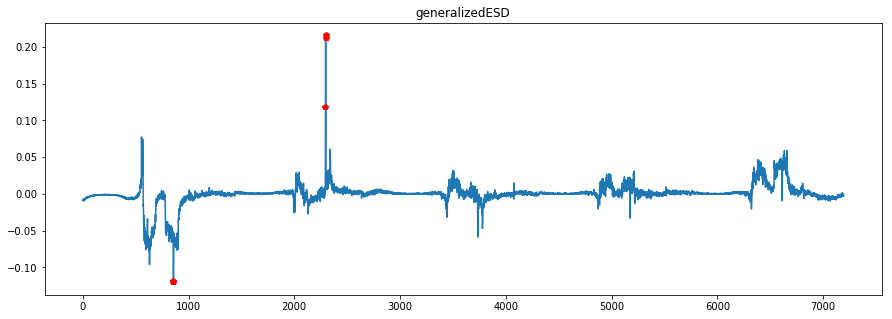

In [31]:
r = pyasl.generalizedESD(diff_data.ravel(), 5, 0.05, fullOutput=True)
# print(r) # (5, [2296, 2297, 857, 2295, 858])
print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.figure(figsize=(15, 5))
plt.plot(diff_data.ravel())
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], diff_data.ravel()[r[1][i]], 'rp')
plt.title('generalizedESD')
plt.savefig('generalizedESD')
plt.show()

In [26]:
def smooth_moving(x, window_len=5):
    """smooth data uisng moving window method
    input:
        x: input data
        window_len: the dimension of the smoothing window; default is 5, and must be odd
    output:
        the smoothed data
    """
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."

    if window_len < 3:
        return x

    if window_len % 2 == 0:
        raise ValueError, "window_len should be an odd integer."
    s = np.r_[x[window_len - 1:0:-1], x, x[-2:-window_len - 1:-1]]
    w = np.ones(window_len, 'd')
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y[(window_len - 1) // 2:-(window_len - 1) // 2]


In [27]:
days = len(date_list)

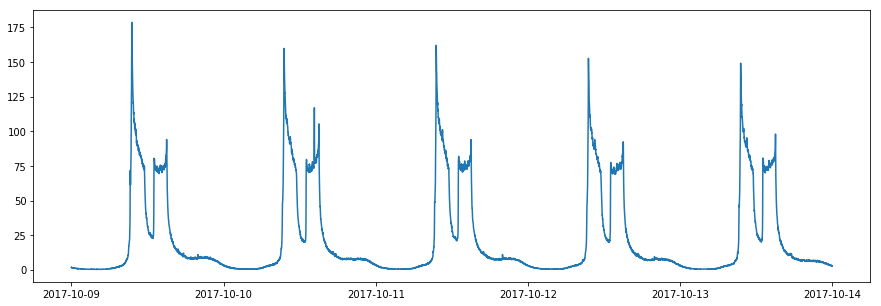

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'])
plt.show()

In [29]:
base_data_flat = test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'].values.copy()
ppd = base_data_flat.size // days
base_data = base_data_flat.reshape((-1, ppd))

In [30]:
base_data.ravel()[anomoly_index]

NameError: name 'anomoly_index' is not defined

In [136]:
base_data.max(axis=0)

array([ 3.46831249,  3.25141875,  3.33740625, ...,  3.63388748,
        3.61739373,  3.43760625])

# Section3: Dynamic Threshold Algorithm 3 (DTA3)

### Calculate

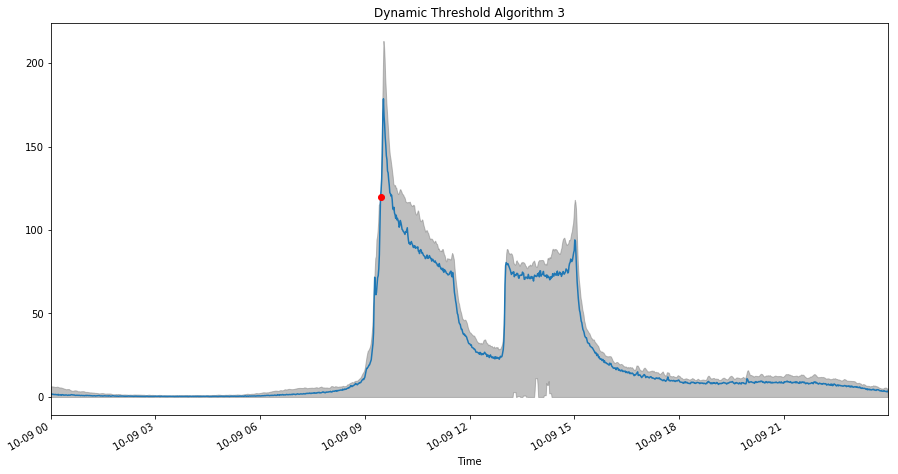

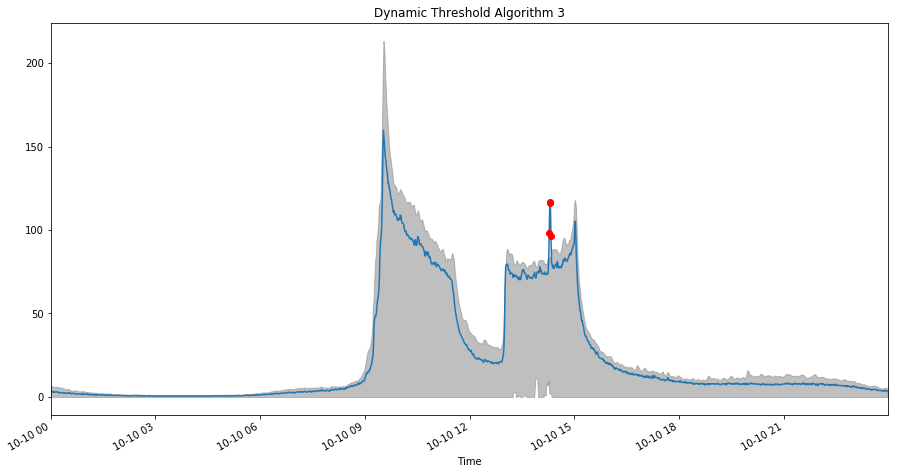

In [36]:
k1, k2 = 5, 100
smooth_len = 5
anomaly_num = 100
base_data_flat = test_data.loc['2017-10-09 00:00:00':'2017-10-13 23:59:59', 'SHOUYE'].values.copy() # must have copy
ppd = base_data_flat.size // days
base_data = base_data_flat.reshape((-1, ppd))
base_data_norm = normalize(base_data, norm='max')
mu = base_data.mean(axis=0)
mu_norm = base_data_norm.mean(axis=0)

diff_data = base_data_norm - mu_norm
r = pyasl.generalizedESD(diff_data.ravel(), anomaly_num, alpha=0.05, fullOutput=False)
anomaly_index = np.array(r[1])
# 1. consider anoamlies affect
# base_data_flat[anomoly_index] = mu[anomoly_index % ppd]
# upper_sigma = (base_data - mu).std(axis=0)
# lower_sigma = (base_data - mu).std(axis=0)
# 2. drop anomalies
base_data_no_anomaly = base_data.copy()
base_data_no_anomaly[np.unravel_index(anomaly_index, (days, ppd))] = np.nan
mu_no_anomaly = np.nanmean(base_data_no_anomaly, axis=0)
upper_sigma = np.nanstd((base_data_no_anomaly - mu_no_anomaly), axis=0)
lower_sigma = np.nanstd((base_data_no_anomaly - mu_no_anomaly), axis=0)
base_data_flat = base_data_no_anomaly
base_data = base_data_flat.reshape((-1, ppd))
upper_thresh = smooth_moving(np.nanmax(base_data, axis=0) + k1 * upper_sigma, window_len=smooth_len)
lower_thresh = smooth_moving(np.maximum(np.nanmin(base_data, axis=0) - k2 * lower_sigma, 0), window_len=smooth_len)
# real test
for date in date_list[:2]:
    real_test_data = test_data.loc[date, 'SHOUYE'].copy()
    idx = np.where(np.any([real_test_data > upper_thresh, real_test_data < lower_thresh], axis=0))
    plt.figure(figsize=(15, 5))
    real_test_data.plot(figsize=(15, 8))
    t = real_test_data.index.values
    plt.plot(t[idx[0]], real_test_data[idx[0]], 'ro')
    plt.fill_between(t, lower_thresh, upper_thresh, color=[0.5, 0.5, 0.5], alpha=0.5)
    plt.title('Dynamic Threshold Algorithm 3')
    plt.savefig('Dynamic Threshold Algorithm 3')
    plt.show()

### Update base_data

In [368]:
def update_model(base_data, new_data, update=True):
    max_anomaly_num = 100
    concat_data = normalize(np.concatenate((base_data, new_data), axis=0), norm='max')
    mu = concat_data.mean(axis=0)
    diff_data = concat_data - mu
    r = pyasl.generalizedESD(diff_data.ravel(), max_anomaly_num * concat_data.shape[0], alpha=0.05, fullOutput=False)
    anomaly_index = np.array(r[1])
    if update:
        if (anomaly_index > 5 * ppd).sum() < max_anomaly_num:
            self.base_data = concat_data[idx]
            for path, dirs, files in os.walk('.'):
                if self.model_path in files:
                    if self.model_path+'.bak' in files:
                        os.remove(self.model_path+'.bak')
                    os.rename(path+'\\'+self.model_path, path+'\\'+self.model_path+'.bak')
            with open(self.model_path, 'wb') as f:
                self.model['base_data'] = self.base_data
                pickle.dump(self.model, f)
            print("Update complete!")
        else:
            print("No need to update!")